<a href="https://colab.research.google.com/github/krvamsi96/pro-machine-learning-algorithms/blob/master/Africa_Crises_complent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload=files.upload()

ERROR! Session/line number was not unique in database. History logging moved to new session 64
Saving african_crises.csv to african_crises.csv


In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv("african_crises.csv")
data.head(),


(   case  cc3  country  ...  currency_crises  inflation_crises  banking_crisis
 0     1  DZA  Algeria  ...                0                 0          crisis
 1     1  DZA  Algeria  ...                0                 0       no_crisis
 2     1  DZA  Algeria  ...                0                 0       no_crisis
 3     1  DZA  Algeria  ...                0                 0       no_crisis
 4     1  DZA  Algeria  ...                0                 0       no_crisis
 
 [5 rows x 14 columns],)

In [5]:
data.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


In [7]:
data.cc3.value_counts()

EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
MAR     75
TUN     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: cc3, dtype: int64

In [8]:
data.country.value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data["cc3"]=lab.fit_transform(data["cc3"])

In [0]:
data["country"]=lab.fit_transform(data["country"])

In [0]:
x=data.drop("banking_crisis",axis=1)
y=data.banking_crisis 

In [12]:
x.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


In [13]:
y.head()

0       crisis
1    no_crisis
2    no_crisis
3    no_crisis
4    no_crisis
Name: banking_crisis, dtype: object

In [15]:
x.shape,y.shape

((1059, 13), (1059,))

In [16]:
corr=x.corr()
corr

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.964105,0.990553,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
cc3,0.964105,1.000000,0.946147,0.051679,-0.012692,-0.312222,0.134268,-0.082447,-0.007799,0.048917,0.012709,0.090759,0.003644
country,0.990553,0.946147,1.000000,0.134990,0.015586,-0.198953,0.155659,-0.000455,-0.041843,0.049184,0.013308,0.097166,0.016491
year,0.115574,0.051679,0.134990,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,-0.012692,0.015586,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,-0.312222,-0.198953,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.134268,0.155659,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,-0.082447,-0.000455,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.007799,-0.041843,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.048917,0.049184,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060


In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

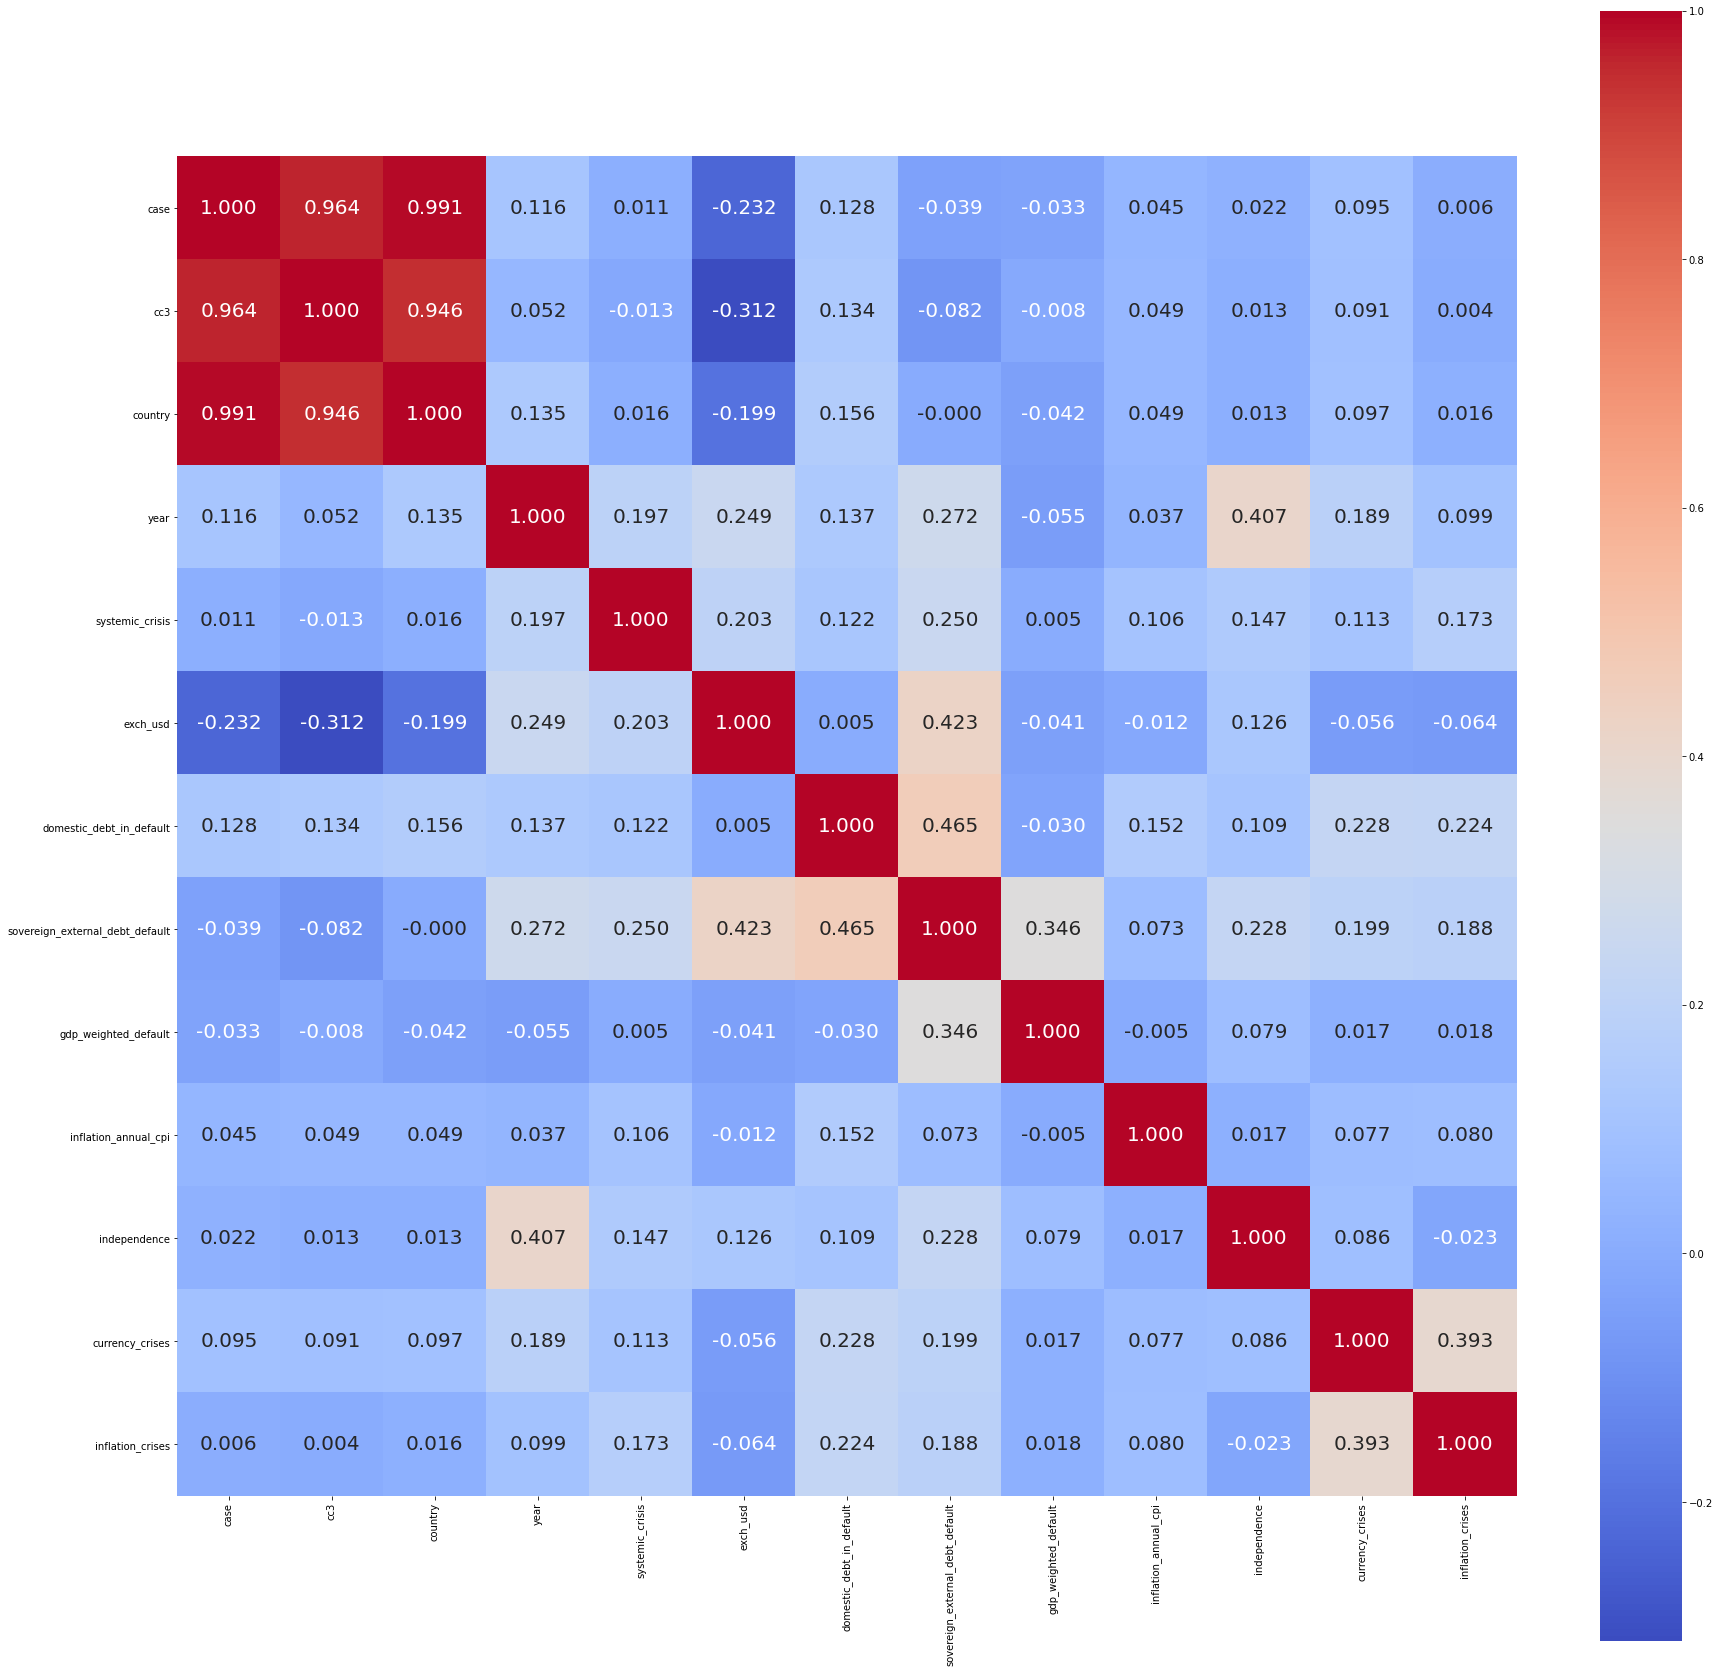

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(corr,cmap='coolwarm',annot=True,square=True,fmt='.3f',annot_kws={'size':20})


In [19]:
x.drop(['cc3','case'],axis=1,inplace=True)
x.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predict=model.predict(x_test)

In [27]:
accuracy=accuracy_score(y_test,predict)*100
print('accuracy:',accuracy,'%')


accuracy: 98.49056603773585 %


In [29]:
confusion_matrix(y_test,predict)


array([[ 25,   4],
       [  0, 236]])